In [1]:
import feedparser
import requests
from bs4 import BeautifulSoup
import pandas as pd
import importlib

import os
path = 'C:/Users/mulle/Documents/iCloudDrive/Documents/19. GITHUB/Crypto'
os.chdir(path)

import sys 
sys.path.append('C:/Users/mulle/Documents/iCloudDrive/Documents/19. GITHUB/Crypto/scripts')
import sentiment_analyzer

importlib.reload(sentiment_analyzer)
import sentiment_analyzer
from sentiment_analyzer import apply_preprocessing
from sentiment_analyzer import sentiment_get
importlib.reload(sentiment_analyzer)

<module 'sentiment_analyzer' from 'C:\\Users/mulle/Documents/iCloudDrive/Documents/19. GITHUB/Crypto/scripts\\sentiment_analyzer.py'>

In [5]:
def pull_rss(url):
    feed = feedparser.parse(url)
    articles = []

    for entry in feed.entries:
        title = entry.title
        link = entry.link
        article_text = entry.description
        date = entry.published
        #more_text = entry.content_encoded
        articles.append({
            'title': title,
            'date' : date,
            'link': link,
            'text': article_text
        })
    df = pd.DataFrame(articles)
    #df = df.sort_values(by='date', ascending=False)
    return df

combined_df = pd.read_csv('data/raw/news_raw/combined_articles.csv')
combined_df

,title,date,link,text,source
0,Why Husky Inu ($HINU) is the Hottest Crypto In...,"Tue, 16 Jul 2024 16:37:41 +0100",https://cryptodaily.co.uk/2024/07/why-husky-in...,Memecoins have regained their former glory as ...,Crypto Daily
1,"Pepe Price Rises Again, Reclaims $5 Billion Ma...","Tue, 16 Jul 2024 16:34:52 +0100",https://cryptodaily.co.uk/2024/07/pepe-price-r...,"The meme coin mania is back in full swing, wit...",Crypto Daily
2,BioMatrix Partners with TapCoins to Revolution...,"Tue, 16 Jul 2024 17:58:31 +0100",https://cryptodaily.co.uk/2024/07/biomatrix-pa...,BioMatrix Partners with TapCoins to Revolution...,Crypto Daily
3,"Bitcoin dominance rises, but trend reversal co...","Tue, 16 Jul 2024 17:02:40 +0100",https://cryptodaily.co.uk/2024/07/bitcoin-domi...,Bitcoin dominance has been trending upward sin...,Crypto Daily
4,Crypto Staking: How to Make Money on OkayCoin,"Tue, 16 Jul 2024 17:19:10 +0100",https://cryptodaily.co.uk/2024/07/crypto-staki...,"With the rapid development in technology, Cryp...",Crypto Daily
...,...,...,...,...,...
425,Bitcoin Price Prediction As JPMorgan Predicts ...,"Fri, 12 Jul 2024 08:51:29 +0000",https://insidebitcoins.com/news/bitcoin-price-...,"<div><img src=""https://insidebitcoins.com/wp-c...",Inside BTC
426,"Minu Price Prediction: MINU Pumps 8%, But Expe...","Fri, 12 Jul 2024 08:24:53 +0000",https://insidebitcoins.com/news/minu-price-pre...,"<div><img src=""https://insidebitcoins.com/wp-c...",Inside BTC
427,Biaoqing Price Prediction: BIAO Plunges 16% As...,"Fri, 12 Jul 2024 08:10:01 +0000",https://insidebitcoins.com/news/biaoqing-price...,"<div><img src=""https://insidebitcoins.com/wp-c...",Inside BTC
428,Bonk Price Prediction: BONK Plummets 10% As In...,"Fri, 12 Jul 2024 07:55:50 +0000",https://insidebitcoins.com/news/bonk-price-pre...,"<div><img src=""https://insidebitcoins.com/wp-c...",Inside BTC


In [6]:
rss_urls = {
    'Crypto Daily': 'https://cryptodaily.co.uk/feed',
    'Nigeria BTC': 'https://feeds.feedburner.com/nigeriabitcoincommunity',
    'BitcFeed': 'https://infoonbitcoin.com/feed/',
    'Crypto News': 'https://cryptonews.exchange/feed/',
    'FetchRSS': 'https://fetchrss.com/rss/608cfdce491e3967e35a5c12608cfeacee1b217b11729ab2.xml',
    'BTC ETH News': 'https://bitcoinethereumnews.com/feed/',
    'BTC Magazine': 'https://bitcoinmagazine.com/.rss/full/',
    'CoinStats': 'https://coinstats.app/blog/feed/',
    'Inside BTC': 'https://insidebitcoins.com/feed'
}

# Pull RSS feeds and combine into a single DataFrame
all_articles = []

for source, url in rss_urls.items():
    try:
        df = pull_rss(url)
        df['source'] = source  # Add a column to identify the source
        all_articles.append(df)
        print(f"Successfully pulled articles from {source}")
    except Exception as e:
        print(f"Error pulling articles from {source}: {str(e)}")

# Combine all DataFrames
rss_new = pd.concat(all_articles, ignore_index=True)

# Sort by date (assuming the date is in a format that can be sorted)
#combined_df['date'] = pd.to_datetime(combined_df['date'], errors='coerce')
#combined_df = combined_df.sort_values(by='date', ascending=False)

# Reset the index
rss_new = rss_new.reset_index(drop=True)

print(f"\nTotal articles pulled: {len(rss_new)}")
combined_df = pd.concat([combined_df, rss_new], ignore_index=True)
combined_df.to_csv('data/raw/news_raw/combined_articles.csv', index=False)
combined_df

Successfully pulled articles from Crypto Daily
Successfully pulled articles from Nigeria BTC
Successfully pulled articles from BitcFeed
Successfully pulled articles from Crypto News
Successfully pulled articles from FetchRSS
Successfully pulled articles from BTC ETH News
Successfully pulled articles from BTC Magazine
Successfully pulled articles from CoinStats
Successfully pulled articles from Inside BTC

Total articles pulled: 430


,title,date,link,text,source
0,Why Husky Inu ($HINU) is the Hottest Crypto In...,"Tue, 16 Jul 2024 16:37:41 +0100",https://cryptodaily.co.uk/2024/07/why-husky-in...,Memecoins have regained their former glory as ...,Crypto Daily
1,"Pepe Price Rises Again, Reclaims $5 Billion Ma...","Tue, 16 Jul 2024 16:34:52 +0100",https://cryptodaily.co.uk/2024/07/pepe-price-r...,"The meme coin mania is back in full swing, wit...",Crypto Daily
2,BioMatrix Partners with TapCoins to Revolution...,"Tue, 16 Jul 2024 17:58:31 +0100",https://cryptodaily.co.uk/2024/07/biomatrix-pa...,BioMatrix Partners with TapCoins to Revolution...,Crypto Daily
3,"Bitcoin dominance rises, but trend reversal co...","Tue, 16 Jul 2024 17:02:40 +0100",https://cryptodaily.co.uk/2024/07/bitcoin-domi...,Bitcoin dominance has been trending upward sin...,Crypto Daily
4,Crypto Staking: How to Make Money on OkayCoin,"Tue, 16 Jul 2024 17:19:10 +0100",https://cryptodaily.co.uk/2024/07/crypto-staki...,"With the rapid development in technology, Cryp...",Crypto Daily
...,...,...,...,...,...
855,"Top Crypto Gainers Today Jul 12 – Illuvium, NE...","Fri, 12 Jul 2024 12:33:58 +0000",https://insidebitcoins.com/news/top-crypto-gai...,"<div><img src=""https://insidebitcoins.com/wp-c...",Inside BTC
856,"Best Crypto to Buy Now July 12- MANTRA, Safe, ...","Fri, 12 Jul 2024 12:19:35 +0000",https://insidebitcoins.com/news/best-crypto-to...,"<div><img src=""https://insidebitcoins.com/wp-c...",Inside BTC
857,Pepe Price Prediction: PEPE Plunges 7% As This...,"Fri, 12 Jul 2024 12:04:05 +0000",https://insidebitcoins.com/news/pepe-price-pre...,"<div><img src=""https://insidebitcoins.com/wp-c...",Inside BTC
858,Shiba Shootout Comes Out Guns Blazing With $60...,"Fri, 12 Jul 2024 11:32:50 +0000",https://insidebitcoins.com/news/shiba-shootout...,"<div><img src=""https://insidebitcoins.com/wp-c...",Inside BTC


In [7]:
combined_df = pd.read_csv('data/raw/news_raw/combined_articles.csv')

In [8]:
combined_df['combined_text'] = combined_df['title'] + ' ' + combined_df['text']
combined_df['ups'] = 1
combined_df

,title,date,link,text,source,combined_text,ups
0,Why Husky Inu ($HINU) is the Hottest Crypto In...,"Tue, 16 Jul 2024 16:37:41 +0100",https://cryptodaily.co.uk/2024/07/why-husky-in...,Memecoins have regained their former glory as ...,Crypto Daily,Why Husky Inu ($HINU) is the Hottest Crypto In...,1
1,"Pepe Price Rises Again, Reclaims $5 Billion Ma...","Tue, 16 Jul 2024 16:34:52 +0100",https://cryptodaily.co.uk/2024/07/pepe-price-r...,"The meme coin mania is back in full swing, wit...",Crypto Daily,"Pepe Price Rises Again, Reclaims $5 Billion Ma...",1
2,BioMatrix Partners with TapCoins to Revolution...,"Tue, 16 Jul 2024 17:58:31 +0100",https://cryptodaily.co.uk/2024/07/biomatrix-pa...,BioMatrix Partners with TapCoins to Revolution...,Crypto Daily,BioMatrix Partners with TapCoins to Revolution...,1
3,"Bitcoin dominance rises, but trend reversal co...","Tue, 16 Jul 2024 17:02:40 +0100",https://cryptodaily.co.uk/2024/07/bitcoin-domi...,Bitcoin dominance has been trending upward sin...,Crypto Daily,"Bitcoin dominance rises, but trend reversal co...",1
4,Crypto Staking: How to Make Money on OkayCoin,"Tue, 16 Jul 2024 17:19:10 +0100",https://cryptodaily.co.uk/2024/07/crypto-staki...,"With the rapid development in technology, Cryp...",Crypto Daily,Crypto Staking: How to Make Money on OkayCoin ...,1
...,...,...,...,...,...,...,...
855,"Top Crypto Gainers Today Jul 12 – Illuvium, NE...","Fri, 12 Jul 2024 12:33:58 +0000",https://insidebitcoins.com/news/top-crypto-gai...,"<div><img src=""https://insidebitcoins.com/wp-c...",Inside BTC,"Top Crypto Gainers Today Jul 12 – Illuvium, NE...",1
856,"Best Crypto to Buy Now July 12- MANTRA, Safe, ...","Fri, 12 Jul 2024 12:19:35 +0000",https://insidebitcoins.com/news/best-crypto-to...,"<div><img src=""https://insidebitcoins.com/wp-c...",Inside BTC,"Best Crypto to Buy Now July 12- MANTRA, Safe, ...",1
857,Pepe Price Prediction: PEPE Plunges 7% As This...,"Fri, 12 Jul 2024 12:04:05 +0000",https://insidebitcoins.com/news/pepe-price-pre...,"<div><img src=""https://insidebitcoins.com/wp-c...",Inside BTC,Pepe Price Prediction: PEPE Plunges 7% As This...,1
858,Shiba Shootout Comes Out Guns Blazing With $60...,"Fri, 12 Jul 2024 11:32:50 +0000",https://insidebitcoins.com/news/shiba-shootout...,"<div><img src=""https://insidebitcoins.com/wp-c...",Inside BTC,Shiba Shootout Comes Out Guns Blazing With $60...,1


In [9]:
reddit = pd.read_csv('data/raw/reddit_pull/all_data.csv')
reddit = reddit[['title', 'date_posted','comments','selftext','subreddit','text','ups']]
reddit

,title,date_posted,comments,selftext,subreddit,text,ups
0,Bitcoin Newcomers FAQ - Please read!,2024-03-16,118,# Welcome to the /r/Bitcoin Newcomers FAQ\n\nY...,Bitcoin,Bitcoin Newcomers FAQ - Please read! # Welcome...,210
1,"Daily Discussion, July 17, 2024",2024-07-17,58,Please utilize this sticky thread for all gene...,Bitcoin,"Daily Discussion, July 17, 2024 Please utilize...",22
2,Which one of you is it?,2024-07-17,101,NaN,Bitcoin,Which one of you is it?,793
3,Democratic Senator Who Called Bitcoin An Ideal...,2024-07-17,18,NaN,Bitcoin,Democratic Senator Who Called Bitcoin An Ideal...,302
4,RIP to the people with paper fingers,2024-07-17,85,NaN,Bitcoin,RIP to the people with paper fingers,264
...,...,...,...,...,...,...,...
553,"Moronic Monday - April 15, 2024 - Your Weekly ...",2024-04-15,33,This is your safe place for questions on finan...,finance,"Moronic Monday - April 15, 2024 - Your Weekly ...",9
554,The Worst Part of a Wall Street Career May Be ...,2024-04-11,90,NaN,finance,The Worst Part of a Wall Street Career May Be ...,673
555,BLS confirms some people get CPI data Early (n...,2024-04-10,5,NaN,finance,BLS confirms some people get CPI data Early (n...,33
556,"Moronic Monday - April 08, 2024 - Your Weekly ...",2024-04-08,63,This is your safe place for questions on finan...,finance,"Moronic Monday - April 08, 2024 - Your Weekly ...",3


In [10]:
reddit.columns = combined_df.columns
combined_df = pd.concat([reddit, combined_df], ignore_index=True)
combined_df.to_csv('data/raw/news_raw/combined_articles.csv', index=False)
combined_df

,title,date,link,text,source,combined_text,ups
0,Bitcoin Newcomers FAQ - Please read!,2024-03-16,118,# Welcome to the /r/Bitcoin Newcomers FAQ\n\nY...,Bitcoin,Bitcoin Newcomers FAQ - Please read! # Welcome...,210
1,"Daily Discussion, July 17, 2024",2024-07-17,58,Please utilize this sticky thread for all gene...,Bitcoin,"Daily Discussion, July 17, 2024 Please utilize...",22
2,Which one of you is it?,2024-07-17,101,NaN,Bitcoin,Which one of you is it?,793
3,Democratic Senator Who Called Bitcoin An Ideal...,2024-07-17,18,NaN,Bitcoin,Democratic Senator Who Called Bitcoin An Ideal...,302
4,RIP to the people with paper fingers,2024-07-17,85,NaN,Bitcoin,RIP to the people with paper fingers,264
...,...,...,...,...,...,...,...
1413,"Top Crypto Gainers Today Jul 12 – Illuvium, NE...","Fri, 12 Jul 2024 12:33:58 +0000",https://insidebitcoins.com/news/top-crypto-gai...,"<div><img src=""https://insidebitcoins.com/wp-c...",Inside BTC,"Top Crypto Gainers Today Jul 12 – Illuvium, NE...",1
1414,"Best Crypto to Buy Now July 12- MANTRA, Safe, ...","Fri, 12 Jul 2024 12:19:35 +0000",https://insidebitcoins.com/news/best-crypto-to...,"<div><img src=""https://insidebitcoins.com/wp-c...",Inside BTC,"Best Crypto to Buy Now July 12- MANTRA, Safe, ...",1
1415,Pepe Price Prediction: PEPE Plunges 7% As This...,"Fri, 12 Jul 2024 12:04:05 +0000",https://insidebitcoins.com/news/pepe-price-pre...,"<div><img src=""https://insidebitcoins.com/wp-c...",Inside BTC,Pepe Price Prediction: PEPE Plunges 7% As This...,1
1416,Shiba Shootout Comes Out Guns Blazing With $60...,"Fri, 12 Jul 2024 11:32:50 +0000",https://insidebitcoins.com/news/shiba-shootout...,"<div><img src=""https://insidebitcoins.com/wp-c...",Inside BTC,Shiba Shootout Comes Out Guns Blazing With $60...,1


In [12]:
combined_df.to_csv('data/raw/news_raw/reddit_rss.csv', index=False)

In [13]:
# Function to determine 'Reddit' or 'RSS'
def determine_source(value):
    if isinstance(value, (int, float)):
        return 'Reddit'
    else:
        return 'RSS'

# Apply the function to the 'source_column' and create 'PULL_SRAT'
combined_df['PULL_SRAT'] = combined_df['link'].apply(determine_source)
combined_df

,title,date,link,text,source,combined_text,ups,PULL_SRAT
0,Bitcoin Newcomers FAQ - Please read!,2024-03-16,118,# Welcome to the /r/Bitcoin Newcomers FAQ\n\nY...,Bitcoin,Bitcoin Newcomers FAQ - Please read! # Welcome...,210,Reddit
1,"Daily Discussion, July 17, 2024",2024-07-17,58,Please utilize this sticky thread for all gene...,Bitcoin,"Daily Discussion, July 17, 2024 Please utilize...",22,Reddit
2,Which one of you is it?,2024-07-17,101,NaN,Bitcoin,Which one of you is it?,793,Reddit
3,Democratic Senator Who Called Bitcoin An Ideal...,2024-07-17,18,NaN,Bitcoin,Democratic Senator Who Called Bitcoin An Ideal...,302,Reddit
4,RIP to the people with paper fingers,2024-07-17,85,NaN,Bitcoin,RIP to the people with paper fingers,264,Reddit
...,...,...,...,...,...,...,...,...
1413,"Top Crypto Gainers Today Jul 12 – Illuvium, NE...","Fri, 12 Jul 2024 12:33:58 +0000",https://insidebitcoins.com/news/top-crypto-gai...,"<div><img src=""https://insidebitcoins.com/wp-c...",Inside BTC,"Top Crypto Gainers Today Jul 12 – Illuvium, NE...",1,RSS
1414,"Best Crypto to Buy Now July 12- MANTRA, Safe, ...","Fri, 12 Jul 2024 12:19:35 +0000",https://insidebitcoins.com/news/best-crypto-to...,"<div><img src=""https://insidebitcoins.com/wp-c...",Inside BTC,"Best Crypto to Buy Now July 12- MANTRA, Safe, ...",1,RSS
1415,Pepe Price Prediction: PEPE Plunges 7% As This...,"Fri, 12 Jul 2024 12:04:05 +0000",https://insidebitcoins.com/news/pepe-price-pre...,"<div><img src=""https://insidebitcoins.com/wp-c...",Inside BTC,Pepe Price Prediction: PEPE Plunges 7% As This...,1,RSS
1416,Shiba Shootout Comes Out Guns Blazing With $60...,"Fri, 12 Jul 2024 11:32:50 +0000",https://insidebitcoins.com/news/shiba-shootout...,"<div><img src=""https://insidebitcoins.com/wp-c...",Inside BTC,Shiba Shootout Comes Out Guns Blazing With $60...,1,RSS


In [14]:
combined_df = sentiment_analyzer.apply_preprocessing(combined_df)
combined_df

Processing Text: 100%|██████████| 1418/1418 [00:11<00:00, 118.55it/s]


,title,date,link,text,source,combined_text,ups,PULL_SRAT,preprocessed_text
0,Bitcoin Newcomers FAQ - Please read!,2024-03-16,118,# Welcome to the /r/Bitcoin Newcomers FAQ\n\nY...,Bitcoin,Bitcoin Newcomers FAQ - Please read! # Welcome...,210,Reddit,bitcoin newcomer faq please read welcome rbitc...
1,"Daily Discussion, July 17, 2024",2024-07-17,58,Please utilize this sticky thread for all gene...,Bitcoin,"Daily Discussion, July 17, 2024 Please utilize...",22,Reddit,daily discussion july please utilize sticky th...
2,Which one of you is it?,2024-07-17,101,NaN,Bitcoin,Which one of you is it?,793,Reddit,one
3,Democratic Senator Who Called Bitcoin An Ideal...,2024-07-17,18,NaN,Bitcoin,Democratic Senator Who Called Bitcoin An Ideal...,302,Reddit,democratic senator call bitcoin ideal choice c...
4,RIP to the people with paper fingers,2024-07-17,85,NaN,Bitcoin,RIP to the people with paper fingers,264,Reddit,rip people paper finger
...,...,...,...,...,...,...,...,...,...
1413,"Top Crypto Gainers Today Jul 12 – Illuvium, NE...","Fri, 12 Jul 2024 12:33:58 +0000",https://insidebitcoins.com/news/top-crypto-gai...,"<div><img src=""https://insidebitcoins.com/wp-c...",Inside BTC,"Top Crypto Gainers Today Jul 12 – Illuvium, NE...",1,RSS,top crypto gainer today jul illuvium near prot...
1414,"Best Crypto to Buy Now July 12- MANTRA, Safe, ...","Fri, 12 Jul 2024 12:19:35 +0000",https://insidebitcoins.com/news/best-crypto-to...,"<div><img src=""https://insidebitcoins.com/wp-c...",Inside BTC,"Best Crypto to Buy Now July 12- MANTRA, Safe, ...",1,RSS,good crypto buy july mantra safe stellar divim...
1415,Pepe Price Prediction: PEPE Plunges 7% As This...,"Fri, 12 Jul 2024 12:04:05 +0000",https://insidebitcoins.com/news/pepe-price-pre...,"<div><img src=""https://insidebitcoins.com/wp-c...",Inside BTC,Pepe Price Prediction: PEPE Plunges 7% As This...,1,RSS,pepe price prediction pepe plunge new pepe upg...
1416,Shiba Shootout Comes Out Guns Blazing With $60...,"Fri, 12 Jul 2024 11:32:50 +0000",https://insidebitcoins.com/news/shiba-shootout...,"<div><img src=""https://insidebitcoins.com/wp-c...",Inside BTC,Shiba Shootout Comes Out Guns Blazing With $60...,1,RSS,shiba shootout come gun blaze raise presale mo...


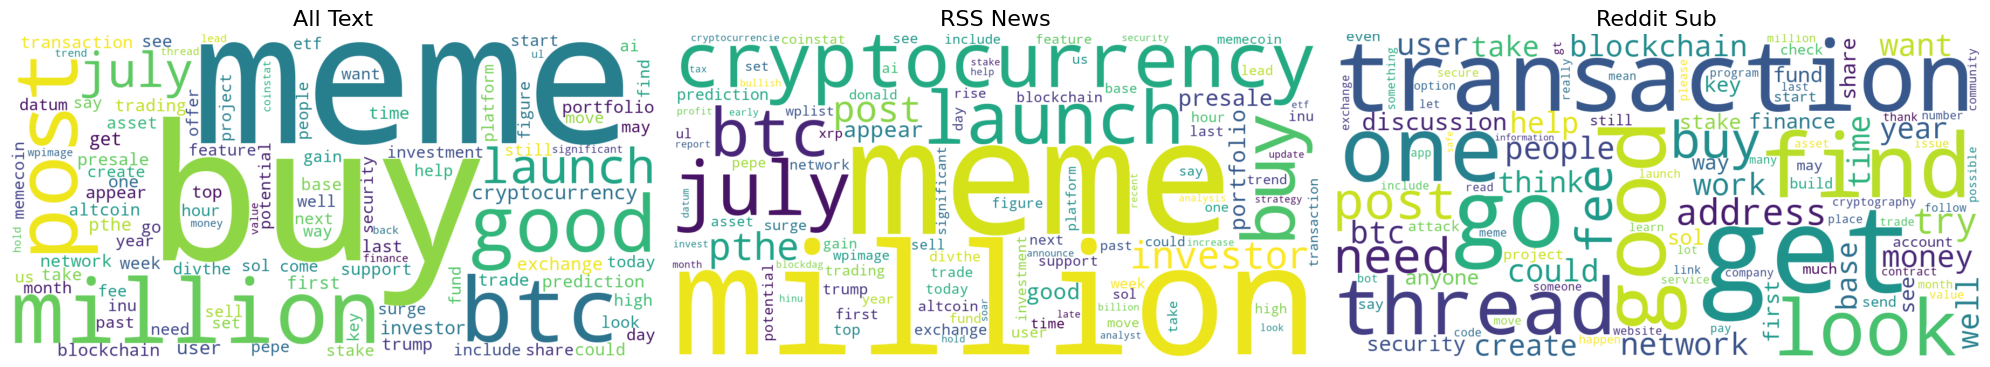

In [19]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import string


rss = combined_df[combined_df['PULL_SRAT'] == 'RSS']
reddit = combined_df[combined_df['PULL_SRAT'] == 'Reddit']

# Define a blacklist of words to exclude
blacklist = {'wpparagraph', 'wplistitem', 'divimg','classreadmorelink', 'targetblankfetchrssaspan', 'hrefhttpsfetchrsscom', 'classwpblockvideovideo', 'stylemarginbottom',
'classmhexcerptmore', 'classattachmentpostthumbnail', 'hrefhttpscryptonewsexchangecrypto','hrefhttpsinfoonbitcoincom', 'hrefhttpswwwnigeriabitcoincommunitycomnigeria',
 'hrefhttpsbitcoinethereumnewscombitcoinethereumnewscomap', 'classreadmorelink','wpheade','p'
  ,'bitcoin', 'token', 'crypto', 'ethereum','use','price', 'market','wallet', 'coin', 'new','eth','question','not','know','solana','make','also'
   }
# Generate word frequencies using Counter
all_text = Counter(word for word in " ".join(combined_df['preprocessed_text']).split() if word.lower() not in blacklist)
rss_news = Counter(word for word in " ".join(rss['preprocessed_text']).split() if word.lower() not in blacklist)
reddit_sub = Counter(word for word in " ".join(reddit['preprocessed_text']).split() if word.lower() not in blacklist)

fig, axs = plt.subplots(1, 3, figsize=(20, 15))  # Adjusted figsize for better visualization

wordcloud = WordCloud(width=1200, height=600, background_color='white', max_words=100)

# Assuming all_text, rss_news, and reddit_sub are dictionaries with word frequencies
data_list = [all_text, rss_news, reddit_sub]
titles = ['All Text', 'RSS News', 'Reddit Sub']


for ax, data, title in zip(axs, data_list, titles):
    wordcloud.generate_from_frequencies(data)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')  # Hide axes
    ax.set_title(title, fontsize=16)

plt.tight_layout()  # Adjust the layout
plt.show()






In [84]:
sorted_word_frequencies = dict(sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True))
filtered_frequencies = {word: freq for word, freq in sorted_word_frequencies.items() if word in ['buy', 'sell']}
filtered_frequencies

{'buy': 169, 'sell': 77}

In [ ]:
# only select certain words from the list
sorted_word_frequencies = 

In [77]:
import nltk
from nltk.tokenize import word_tokenize

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim import corpora
import gensim
### Tokenize
nltk.download('punkt')  # Download the necessary tokenizer from NLTK

# Function to tokenize text
def tokenize(text):
    return word_tokenize(text.lower())  # Tokenize and convert to lower case

# Applying the tokenization function to your DataFrame
combined_df['tokens'] = combined_df['preprocessed_text'].apply(tokenize)

# Create a dictionary and corpus required for Topic Modeling
dictionary = corpora.Dictionary(combined_df['tokens'])
corpus = [dictionary.doc2bow(text) for text in combined_df['tokens']]

# Number of topics
num_topics = 18

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=10, workers=2)

# Display the topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mulle\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


KeyboardInterrupt: 

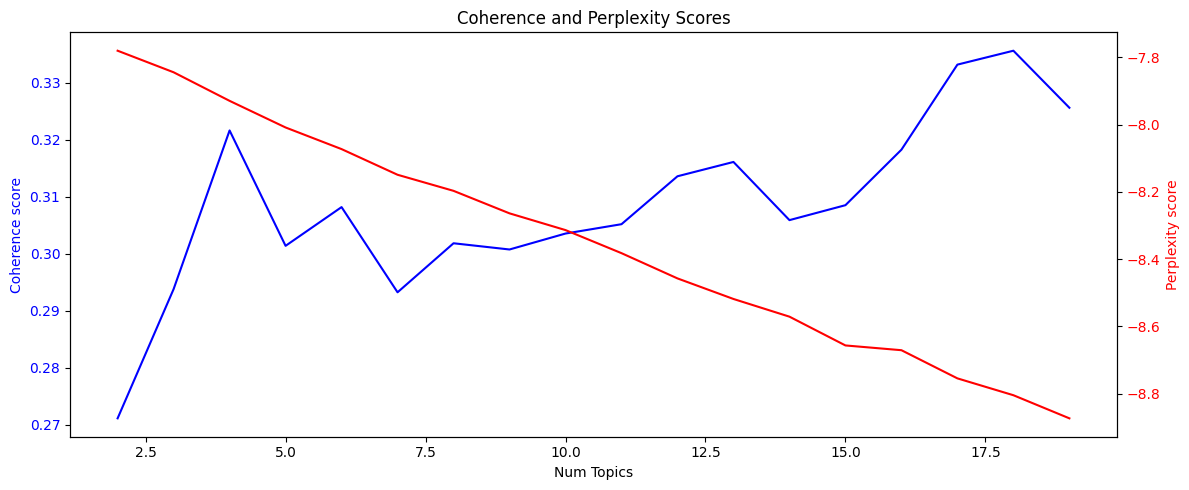

Optimal number of topics: 18


In [36]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

def evaluate_topic_numbers(corpus, dictionary, texts, start=2, limit=20, step=1):
    coherence_values = []
    perplexity_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        perplexity_values.append(model.log_perplexity(corpus))
    
    # Plot
    x = range(start, limit, step)
    fig, ax1 = plt.subplots(figsize=(12,5))
    
    ax1.plot(x, coherence_values, 'b-', label='Coherence')
    ax1.set_xlabel('Num Topics')
    ax1.set_ylabel('Coherence score', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    
    ax2 = ax1.twinx()
    ax2.plot(x, perplexity_values, 'r-', label='Perplexity')
    ax2.set_ylabel('Perplexity score', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    
    plt.title('Coherence and Perplexity Scores')
    fig.tight_layout()
    plt.show()
    
    return model_list, coherence_values, perplexity_values

# Call the function
model_list, coherence_values, perplexity_values = evaluate_topic_numbers(corpus, dictionary, combined_df['tokens'])

# Find the model with the highest coherence score
optimal_model = model_list[coherence_values.index(max(coherence_values))]
print(f"Optimal number of topics: {optimal_model.num_topics}")

In [82]:
x = combined_df.copy()
x = sentiment_get(combined_df)
sentiment_avg = x['sentiment_score'].mean()
sentiment_avg

Analyzing Sentiment:   0%|          | 0/988 [00:00<?, ?it/s]

Analyzing Sentiment: 100%|██████████| 988/988 [00:00<00:00, 3581.68it/s]


0.29150991902834006